In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

# Datos tabulares

In [22]:
df = pd.read_csv("data/titanic.csv")

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Desde leer el conjunto de datos, hasta contestar proguntas sobre los datos con pocas lineas de codigo:


**¿Cual es la distribucion de edades de los pasajeros?**

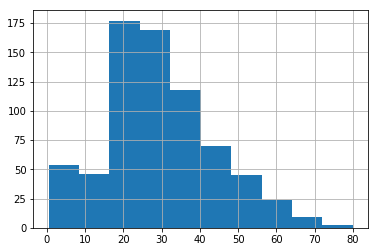

In [24]:
df['Age'].hist()

**¿Cual es la tasa de suervivencia de los pasajeros para los distintos sexos?**

In [25]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.188908


**¿Como difiere la tasa de supervivencia entre las diferentes clases?**

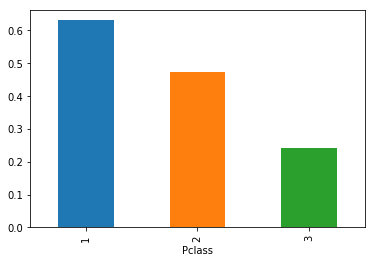

In [26]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

**¿Las personas jovenes tuvieron mas chances de sobrevivir?**

In [27]:
df['Survived'].sum() / df['Survived'].count()

0.3838383838383838

In [28]:
df25 = df[df['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0.4119601328903654

Toda las funcionalidades necesarias de los ejemplos de arriba van a ser explicadas a lo largo del tutorial.

# Estructuras de datos

Pandas provee dos objetos de datos fundamentales, para datos 1D(``Series``) y datos 2D (``DataFrame``).

## Series

Una `Series` es un contenedor basico para **datos unidimensionales etiquetados**. Puede ser creado al igual que un array de NumPy:

In [29]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Atributos de una Series: `index` y `values`

Las series tienen incorporado el concepto de un indice (**index**), el cual por defecto tiene los numeros de *0* hasta *N - 1*

In [30]:
s.index

RangeIndex(start=0, stop=4, step=1)

Se puede acceder al array de numpy subyacente con el atributo `.values`:

In [31]:
s.values

array([0.1, 0.2, 0.3, 0.4])

Se puede acceder a los valores de una serie a partir del indice, igual que con los arrays de numpy:

In [32]:
s[0]

0.1

A diferencia del array de numpy, este indice puede tomar valores distintos a numeros enteros:

In [33]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [34]:
s2['c']

2

De esta manera, un objeto ``Series`` puede ser pensado de manera similar a un diccionario ordenado, que mapea de un valor tipado a otro valor tipado.

De hecho, es posible construir series directamente desde un diccionario de python:

In [35]:
pop_dict = {'Germany': 81.3, 
            'Belgium': 11.3, 
            'France': 64.3, 
            'United Kingdom': 64.9, 
            'Netherlands': 16.9}
population = pd.Series(pop_dict)
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

Podemos indexar las poblaciones al igual que un diccionario:

In [36]:
population['France']

64.3

pero con el poder de los arrays de numpy:

In [37]:
population * 1000

Germany           81300.0
Belgium           11300.0
France            64300.0
United Kingdom    64900.0
Netherlands       16900.0
dtype: float64

## DataFrames: Datos Multi-dimensionales


Un DataFrame es una **estructura de datos tabular** (objeto multidimensional para contener datos etiquetados) compuesta por filas y columnas, semejante a una hoja de calculo, una base de datos, o un objeto data.frame de R. Pueden pensar que son muchas ``Series`` que comparten el mismo indice.

<img src="img/dataframe.png" width=110%>

Una de las formas mas communes de crear un dataframe es a partir de un diccionario de arrays o listas.

Observen que en el Jupyter Notebook, el dataframe se muestra de con un formato enriquecido:

In [38]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### Atributos de un DataFrame

Un Dataframe ademas de tener el atributo `index`, tambien tiene el atributo `columns`:

In [39]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [40]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

Para verificar el tipo de dato de cada columna:

In [41]:
countries.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

Y para tener una vision general de la informacion se puede utilizar el metodo `info()`:

In [42]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
country       5 non-null object
population    5 non-null float64
area          5 non-null int64
capital       5 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


Ademas, el DataFrame tiene el atributo `values`, pero cuidado: cuando se tienen datos heterogeneos, todos los valores son convertidos al tipo de dato mas basico posible (upcasted):

In [43]:
countries.values

array([['Belgium', 11.3, 30510, 'Brussels'],
       ['France', 64.3, 671308, 'Paris'],
       ['Germany', 81.3, 357050, 'Berlin'],
       ['Netherlands', 16.9, 41526, 'Amsterdam'],
       ['United Kingdom', 64.9, 244820, 'London']], dtype=object)

Si no nos gusta como se ve el indice, podemos resetearlo y utilizar una columna como indice:

In [44]:
countries = countries.set_index('country')
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


Para acceder a una `Series` representando una columna, se puede utilizar la sintaxis de indexado usual:

In [45]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

# Operaciones Basicas en Series/Dataframes

A medida que prueban cosas con los DataFrames, van a notar que muchas de las operaciones que tienen los arrays de numpy tambien funcionan en los dataframes.

In [46]:
# redefining the example objects

population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

countries = pd.DataFrame({'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']})

### Operaciones por elemento (igual que numpy)

Al igual que los arrays de numpy, muchas de las operaciones funcionan por elemento:

In [47]:
population / 100

Germany           0.813
Belgium           0.113
France            0.643
United Kingdom    0.649
Netherlands       0.169
dtype: float64

In [48]:
countries['population'] / countries['area']

0    0.000370
1    0.000096
2    0.000228
3    0.000407
4    0.000265
dtype: float64

### Alineacion! (diferente de numpy)

Simplemente, presten atencion al alineamiento (**alignment**): operaciones entre series se van a alinear a partir del indice:  

In [49]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [50]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [51]:
s2

France     64.3
Germany    81.3
dtype: float64

In [52]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

### Reduciones (igual a numpy)

El numero de poblacion promedio:

In [53]:
population.mean()

47.739999999999995

La menor area:

In [54]:
countries['area'].min()

30510

Para los dataframes, usualmente solo las columnas numericas son incluidas en el resultado:

In [55]:
countries.median()

population        64.3
area          244820.0
dtype: float64

<div class="alert alert-success">
    <b>EJERCICIO</b>: Calcular la poblacion promedio relativa a Belgica (Belgium)
</div>

<div class="alert alert-success">
    <b>EJERCICIO</b>: Calcular la densidad poblacional para cada pais y agregarla al dataframe como una nueva columna.
</div>

### Otros metodos bastante utiles

Ordenar los valores del DataFrame a partir de los valores de una columna:

In [56]:
countries.sort_values('density', ascending=False)

KeyError: 'density'

Un metodo muy util es ``describe()``, el cual calcula estadisticos que resumen la informacion de cada columna:

In [57]:
countries.describe()

,population,area
count,5.000000,5.000000
mean,47.740000,269042.800000
std,31.519645,264012.827994
min,11.300000,30510.000000
25%,16.900000,41526.000000
50%,64.300000,244820.000000
75%,64.900000,357050.000000
max,81.300000,671308.000000


El metodo `plot` se puede utilizar para construir rapidamente visualizaciones de los datos en varias formas:

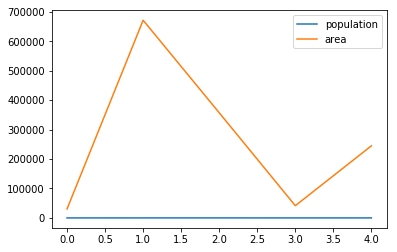

In [58]:
countries.plot()

Pero, para este conjunto de datos, no dice mucho:

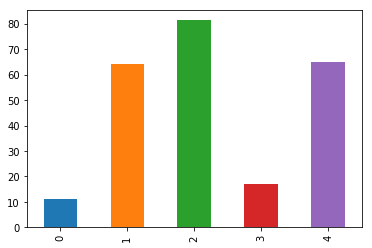

In [59]:
countries['population'].plot(kind='bar')

Pueden probar los distintos tipos de graficos usando el parametro `kind` con los valores: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin'

## Importando y explortando datos

Un gran rango de formatos de entrada y salida son soportados de manera nativa por pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* ...

In [61]:
# pd.read

In [62]:
# states.to

## Otras caracteristicas

* Trabajar con datos faltantes (`.dropna()`, `pd.isnull()`)
* Unir datos (`concat`, `join`)
* Agrupar datos: la funcionalidad de `groupby`
* Reorganizar datos (`stack`, `pivot`)
* Manipulacion de Series Temporales (remuestreo, zonas temporales, ..)
* Facil creado de visualizaciones

Hay muchas, pero muchas mas operaciones muy interesantes que se pueden aplicar a las Series o los DataFrames, pero en vez de seguir usando datos de juguete, vamos a ver un ejemplo del mundo real, y en el camino vamos a demostrar algunos de los conceptos mas avanzados.

Nos vemos en los siguentes *notebooks*!

## Acknowledgement

> *© 2015, Stijn Van Hoey and Joris Van den Bossche  (<mailto:stijnvanhoey@gmail.com>, <mailto:jorisvandenbossche@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).

---